Test Accuracy: 0.94
Label Encoding Mapping: {'CallManavUMass': 0, 'PickUpCall': 1, 'end': 2, 'unlock': 3}


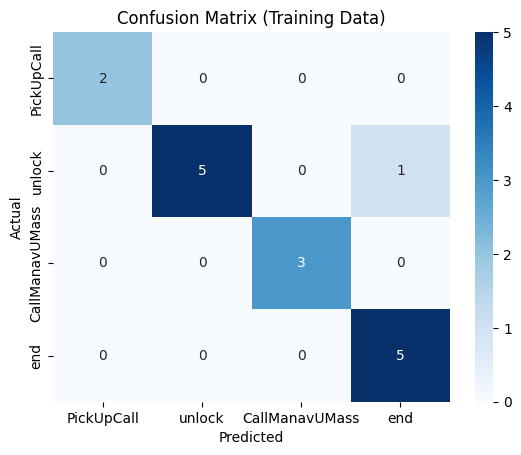

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib


data = pd.read_csv('combine.csv')
data = data.sample(frac=1).reset_index(drop=True)
data = data.dropna()
feature_to_prioritize = 'syllable_count'

# Multiply the feature by a factor (e.g., 1.5 to give 50% more priority)
data[feature_to_prioritize] = data[feature_to_prioritize] * 1.5
X = data.drop(columns=['Label'])
y = data['Label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

import joblib
joblib.dump(model, 'word_prediction_model.pkl')
print("Label Encoding Mapping:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))

conf_matrix = confusion_matrix(y_test, y_pred)
labels = list(y.unique())  # Unique labels in the dataset
sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix (Training Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
